<a href="https://colab.research.google.com/github/AlejandraJaramillo19/boolean/blob/master/Alejandra_Jaramillo_Mejia_BVP_VClase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problemas de valores de frontera

Considere el problema de una masa tirada hacia arriba:

$$
\frac{d^2y}{dt^2} = -g
$$

El problema que queremos resolver es saber cuál debe ser la trayectoria tal que, partiendo de la condición $y(0)$ la bola caiga al suelo nuevamente exactamente al cabo de $t_f = 10$s. Esto es bajo la condición final $y(10) = 0$. Este es un caso típico de valor de frontera que se puede resolver usando dos métodos:

## Método de Shooting

El método de shooting es un método de ensayo y error. Para hallar la trayectoria deseada debo simular varias trayectorias asignando valores a la velocidad inicial y simular durnate el tiempo requerido por el problema $t = 10$s y ver dónde queda la solución. Si nos quedamos cortos (largos), entonces repetimos el proceso aumentando (disminuyendo) la condición inicial que no conocemos.

Nótese que este problema puede ser descrito como un problema de búsqueda de ceros.

### Ejercicio 1:
Resuelva el problema del problema del proyectil tirado en vertical, sujeto a las condiciones de frontera $y(0)=0$ y $y(t=10)=0$

In [ ]:
print(vc,i)

48.99996280670166 20


Text(0.5, 1.0, 'Método Shopting - Problema de valor a la forontera')

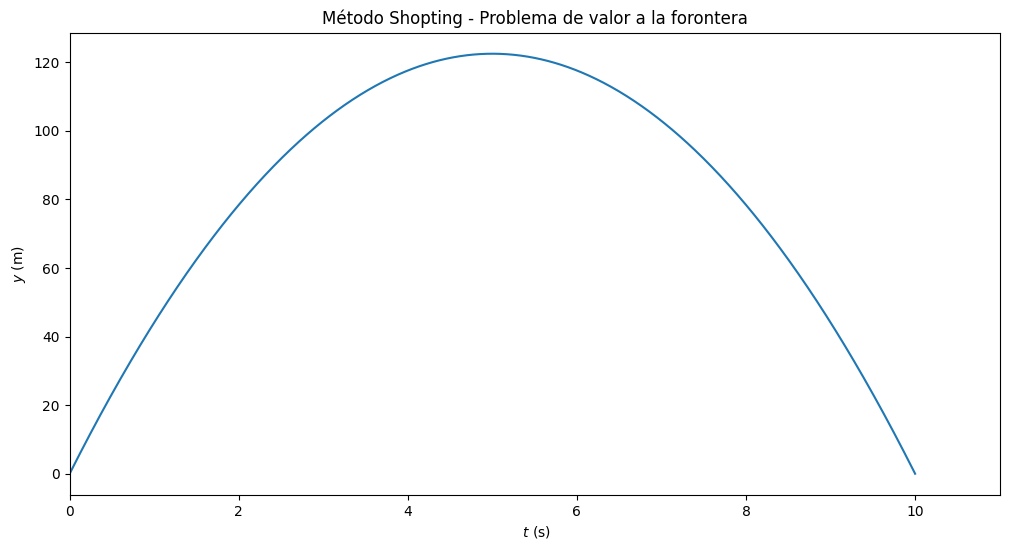

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

def f(t,X,g):
  y=X[0]
  vy=X[1]
  return [vy,-g]

tspan=[0,10]

va=5
vb=100


CIa=[0, va]
solucion1 = solve_ivp(f, tspan, CIa, dense_output=True, args=(9.8,),rtol = 1e-6, atol = 1e-8)
pos_final = solucion1.sol(tspan[-1])[0]
f_a = pos_final

CIb = [0,vb]
solution = solve_ivp(f,tspan,CIb,dense_output = True, rtol = 1e-6,atol = 1e-6,args = (9.8,))
pos_final = solution.sol(tspan[-1])[0]
f_b = pos_final


tol=100
while(tol>1e-4):
  ## definir un punto intermedio de la velocidad
  vc=(va+vb)/2
  CIc=[0,vc]
  solution = solve_ivp(f, tspan, CIc, dense_output=True, args=(9.8,),rtol = 1e-6, atol = 1e-6)
  pos_final=solution.sol(tspan[-1])[0]
  f_c=pos_final
  # donde quedo el cambio de signo
  if (f_a*f_c)<0:
    vb=vc
  elif (f_b*f_c)<0:
    va=vc
  tol=np.abs(f_c)
  ## volver a calcular el punto intermedio


tplot = np.linspace(0,10,1000)
solution_y_final = solution.sol(tplot)[0]
plt.figure(figsize=(12,6))
plt.plot(tplot,solution_y_final)
plt.xlim(0,11)

plt.xlabel(r' $t$ (s)')
plt.ylabel(r'$y$ (m)')
plt.title('Método Shopting - Problema de valor a la forontera')

In [ ]:
print(vc)

48.99999976158142



## Método de relajación (relaxation method)

El método de relajación consiste en transformar las EDO en ecuaciones en diferencias en el espacio de interés, proponer una solución de prueba inicial que cumpla con las condiciones de contorno e iterar las ecuaciones en diferencias hasta llegar a una solución.

Por ejemplo, consideremos la ecuación del proyectil lanzado en vertical. Recordando que

$$
f'(t) = \frac{f(t+h/2)-f(t-h/2)}{h} \\
f''(t) = \frac{f'(t+h/2)-f'(t-h/2)}{h} = \frac{f(t+h)+f(t-h)-2f(t)}{h^2}
$$

Es posible escrbir la ecuación del pryectil como

$$
\frac{y(t+h)+y(t-h)-2y(t)}{h^2}=-g
$$

de la ecuación anterior es posible despejar $y(t)$ como

$$
y(t)=\frac{1}{2}\left[ y(t+h) + y(t-h)\right]  + \frac{1}{2}gh^2
$$

Partiendo de una solución de prueba $y^0(t)$, podemos iterar la ecuación anterior hasta converger a la solución deseada.

### Ejercicio 2:

Resuelva por el método de relajación el problema de la bala lanzada en vertical del ejercicio 1

Text(0.5, 1.0, 'Método de Relajación - Problema de valor a la forontera')

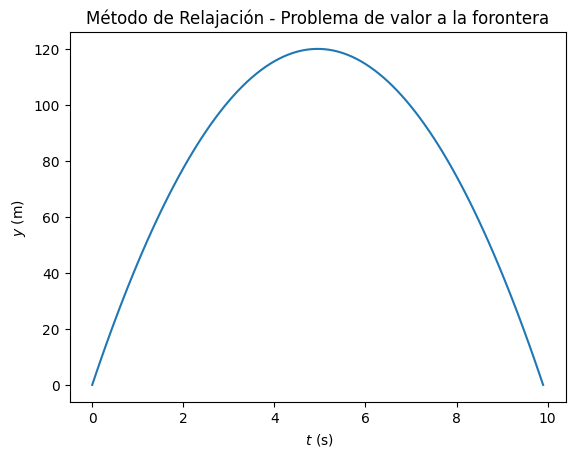

In [ ]:

h=0.1
t= np.arange(0,10,h)
ysol=np.zeros(len(t))
g=9.8

# condiciones de frontera
ysol[0]=0
ysol[-1]=0

# definir la tolerancia
tol=100

while np.abs(tol)>(1e-4):
  y_viejo=np.copy(ysol) # hacer una copia para no tener problemas con la ref de python
  ytmash=ysol[2:]
  ytmenosh=ysol[:-2]
  ysol[1:-1]=0.5*(ytmash + ytmenosh)+0.5*g*(h**2)
  tol=np.max(np.abs(y_viejo-ysol))


plt.plot(t,ysol)

plt.xlabel(r' $t$ (s)')
plt.ylabel(r'$y$ (m)')
plt.title('Método de Relajación - Problema de valor a la forontera')

## Método BVP scipy

Scipy trae consigo métodos de solución de BVPs, aunque son discutiblemente más fáciles de utilizar. Intente leer la ayuda de scipy.integrate.solve_bvp y resuelva el ejercicio desarrollado hasta ahora en clase

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

In [ ]:
from scipy.integrate import solve_bvp

solve_bvp?


In [ ]:
t = np.linspace(0, 10,10)
g=9.8

def f(t,X):
  y=X[0]
  vy=X[1]
  # matriz, primera fila info d las v
  return np.vstack((vy,-g*np.ones(len(t))))

def bc(ya, yb):
  ## los valores iniciales son la primera condicion ya que se refiere a la altura
  return np.array([ya[0], yb[0]])

## una solucion
y_a = np.zeros((2, t.size))  ## matriz = fila uno altura(y) fila dos velocidad(vy)


#from scipy.integrate import solve_bvp

sol= solve_bvp(f, bc, t, y_a)

Text(0.5, 1.0, 'Problema de valor a la forontera con Solve_bvp')

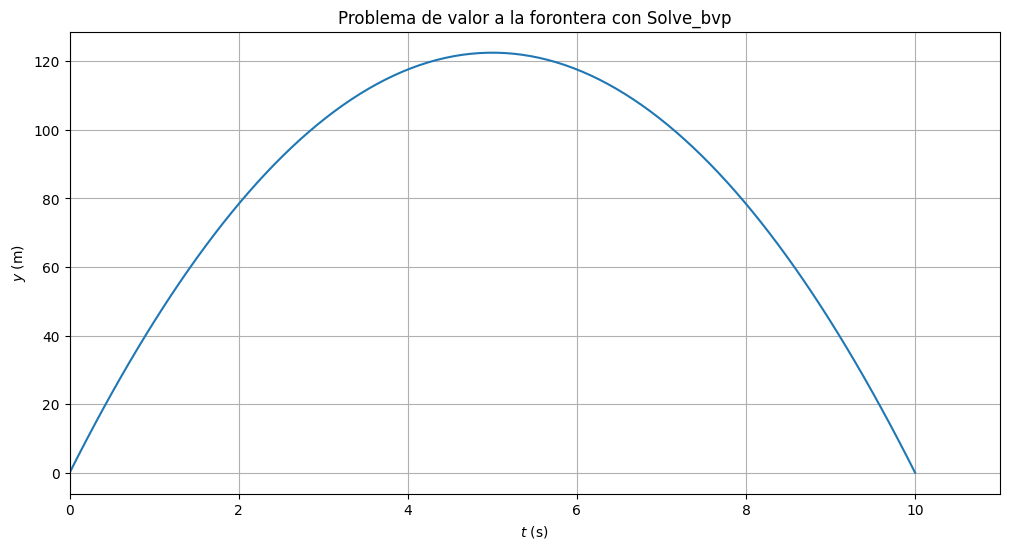

In [ ]:
t_plot = np.linspace(0,10,100)
y_plot = sol.sol(t_plot)[0]


plt.figure(figsize=(12,6))
plt.grid()
plt.plot(t_plot,y_plot)
plt.xlim(0,11)
plt.xlabel(r'$t$ (s)')
plt.ylabel(r'$y$ (m)')
plt.title('Problema de valor a la forontera con Solve_bvp')